In [2]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Load cleaned data
df = pd.read_csv('/content/drive/MyDrive/Project Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df.drop('customerID', axis=1, inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Encode categoricals
from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Split again
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [3]:
# Initialize the SHAP explainer
explainer = shap.Explainer(model)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

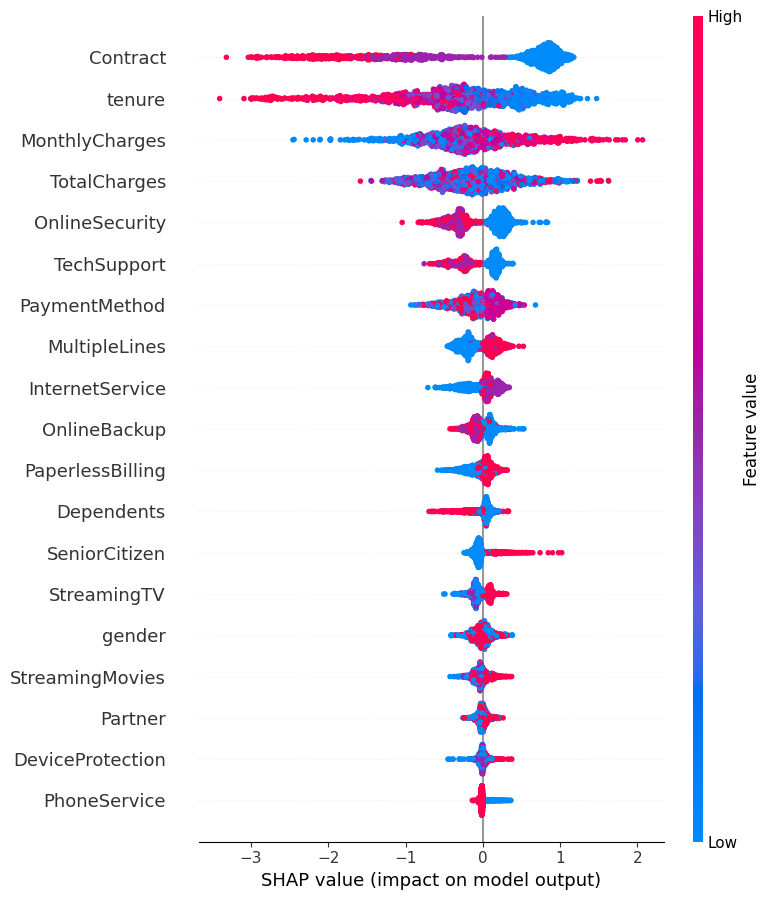

In [4]:
# Global feature importance
shap.summary_plot(shap_values, X_test)

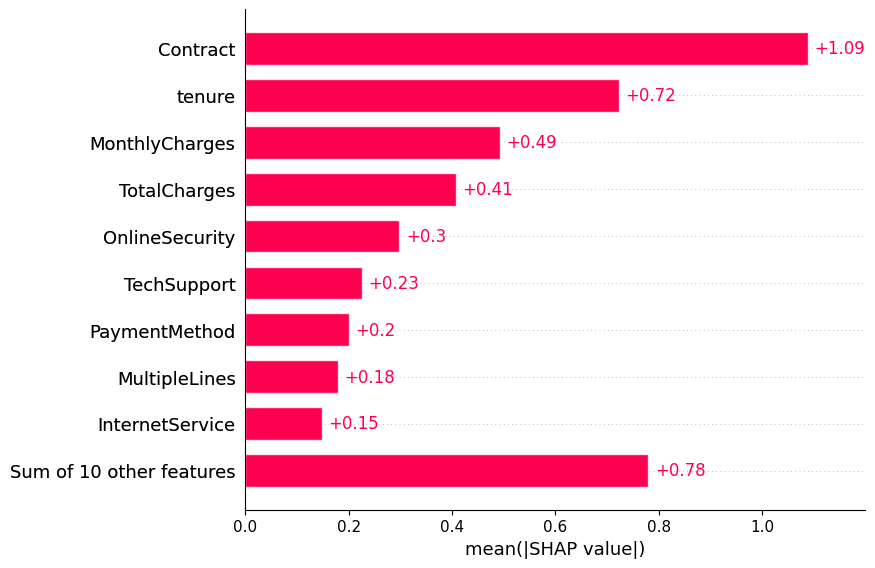

In [5]:
# Mean absolute SHAP value per feature
shap.plots.bar(shap_values)

In [8]:
explainer = shap.Explainer(model)  # use shap.Explainer for Tree/Linear models
shap_values = explainer(X_test)    # returns a shap.Explanation object

# Visualize force plot for the first prediction
shap.initjs()
shap.force_plot(shap_values[0].base_values, shap_values[0].values, X_test.iloc[0])